In [3]:
from threading import Thread
import random


In [9]:
import multiprocessing

numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)


Num of cores are:  8


In [11]:
import threading

activeThread = threading.active_count()
print ("Num of threads: ",activeThread)

Num of threads:  8


In [4]:
def matrix_gen(bounds, n, m):
    mat = []
    for i in range(n):
        row = [random.randint(bounds[0], bounds[1]) for _ in range(m)]
        # print(row)
        mat.append(row)
        # print(mat)
    return mat

In [5]:
def display(mat):
    for i in range(len(mat)):
        print(mat[i])

In [8]:
mat = matrix_gen((-100,100),50,50)
#display(mat)

In [13]:
import threading
import time

def worker():
    print("Thread started")
    time.sleep(2)  # Simulate some work
    print("Thread finished")

# Create and start multiple threads
threads = []
for _ in range(3):
    t = threading.Thread(target=worker)
    t.start()
    threads.append(t)
    

active_threads = threading.active_count()
print("Number of active threads:", active_threads)
# Wait for all threads to finish
for t in threads:
    t.join()

# Get the number of active threads
active_threads = threading.active_count()
print("Number of active threads:", active_threads)


Thread startedThread started

Thread started
Number of active threads: 11
Thread finishedThread finished
Thread finished

Number of active threads: 8


In [15]:
def matrix_multiply(matrix1, matrix2):
    k = len(matrix1)
    result = [[0 for _ in range(k)] for _ in range(k)]
    for i in range(k):
        for j in range(k):
            for l in range(k):
                result[i][j] = matrix1[i][l] * matrix2[l][j]

    return result



### Matrix Multiplication using Multi-threading 

In [26]:
matrix_dim = 10
num_threads_range = 20
M = matrix_gen((-10,10), 10,10)
execution_times = [0.0 for _ in range(num_threads_range)]

In [27]:
display(M)

[7, 3, 1, 0, -3, 2, 2, -2, 7, 10]
[-8, 9, 7, 5, -6, 7, 2, -2, 8, -8]
[-6, 6, -2, 1, -3, -5, 7, 4, -1, -6]
[5, -8, -7, 9, 0, -7, 6, -1, -8, -1]
[-9, 10, 10, -2, -9, -2, -1, -5, 6, -9]
[9, 5, 6, 1, -7, -2, -10, 9, -2, -6]
[1, 1, 7, 9, 9, 6, 7, 2, 8, 0]
[-2, 2, -3, -3, 5, 9, 7, -4, -10, 0]
[4, -9, -3, 8, -7, 9, 6, -6, -10, 5]
[2, 6, 1, 1, -10, -3, 1, -10, -5, -3]


In [30]:
def perform_matrix_multiplication(M, num_matrices=100):
    dimension = len(M)
    for num_threads in range(1, num_threads_range + 1):  # iterating over different numbers of threads to check for performance
        threads = []
        start_time = time.time()       # timer started
        for _ in range(num_matrices): 
            # creating multiple random matirx to be multiplied by matirx M
            random_matrices = [[[round(random.uniform(0, 1), 2) for _ in range(dimension)] for _ in range(dimension)] for _ in range(num_matrices)]    

            # multplying each matrix in list of matrix in random_matrices 
            for matrix in random_matrices:
                thread = threading.Thread(target=matrix_multiply, args=(M, matrix))  # created a thread 
                threads.append(thread)
                thread.start()     # straing the thread 

            for thread in threads: 
                thread.join()   # waiting for all the thereds to finish 

        end_time = time.time()    # ending time , time taken to multiply all the matrix when number of threads are varying in range
        execution_times[num_threads - 1] = end_time - start_time    # storing this time in a list 
    return execution_times

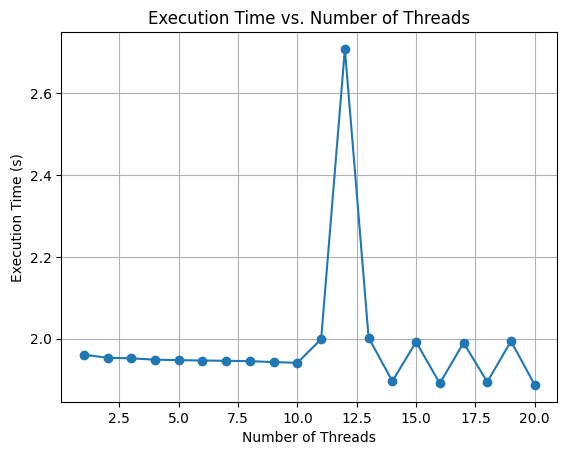

In [37]:
import matplotlib.pyplot as plt

# Your data
num_threads = list(range(1, num_threads_range + 1))  # Assuming num_threads_range is defined elsewhere
execution_times = perform_matrix_multiplication(M, 100)  # Assuming perform_matrix_multiplication is defined elsewhere

# Plotting
plt.plot(num_threads, execution_times, marker='o', linestyle='-')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Threads')
plt.grid(True)
plt.show()


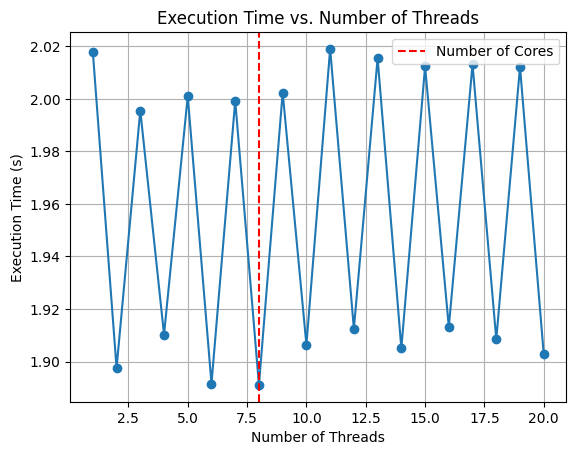

In [40]:
import matplotlib.pyplot as plt

# Your data
num_cores = 8
num_threads = list(range(1, num_threads_range + 1))
execution_times = perform_matrix_multiplication(M, 100)

# Plotting
plt.plot(num_threads, execution_times, marker='o', linestyle='-')
plt.axvline(x=num_cores, color='r', linestyle='--', label='Number of Cores')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Threads')
plt.grid(True)
plt.legend()
plt.show()


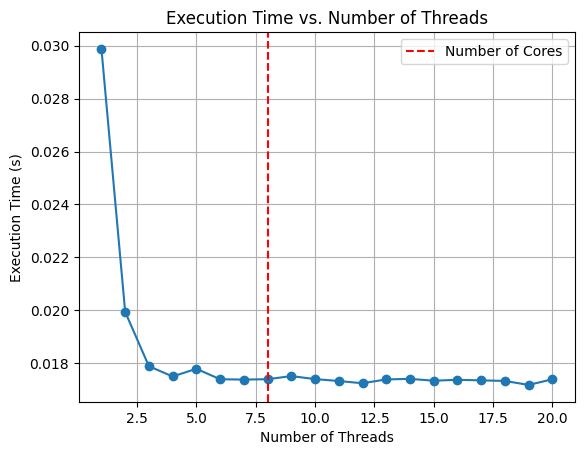

In [42]:
import matplotlib.pyplot as plt

# Your data
num_cores = 8
num_threads = list(range(1, num_threads_range + 1))
execution_times = perform_matrix_multiplication(M, 10)

# Plotting
plt.plot(num_threads, execution_times, marker='o', linestyle='-')
plt.axvline(x=num_cores, color='r', linestyle='--', label='Number of Cores')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Threads')
plt.grid(True)
plt.legend()
plt.show()


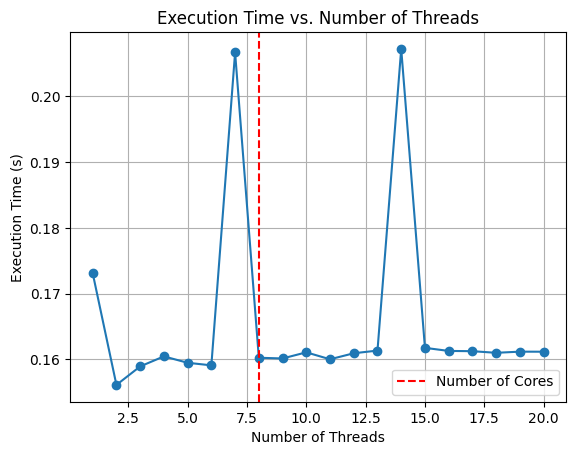

In [43]:
import matplotlib.pyplot as plt

# Your data
num_cores = 8
num_threads = list(range(1, num_threads_range + 1))
execution_times = perform_matrix_multiplication(M, 30)

# Plotting
plt.plot(num_threads, execution_times, marker='o', linestyle='-')
plt.axvline(x=num_cores, color='r', linestyle='--', label='Number of Cores')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Threads')
plt.grid(True)
plt.legend()
plt.show()


In [46]:
!pip install tabulate
from tabulate import tabulate

# Your data
num_threads = list(range(1, num_threads_range + 1))
execution_times = perform_matrix_multiplication(M, 100)

# Organize the data into a list of tuples for tabulate
data = [(num_threads[i], execution_times[i]) for i in range(len(num_threads))]

# Print the table
print(tabulate(data, headers=["Number of Threads", "Execution Time (s)"], tablefmt="pretty"))


+-------------------+--------------------+
| Number of Threads | Execution Time (s) |
+-------------------+--------------------+
|         1         | 1.9402318000793457 |
|         2         | 1.9873039722442627 |
|         3         | 1.8885469436645508 |
|         4         | 1.9931409358978271 |
|         5         | 1.8895301818847656 |
|         6         | 1.9337871074676514 |
|         7         | 1.9925999641418457 |
|         8         | 1.9437322616577148 |
|         9         | 1.8833839893341064 |
|        10         | 1.9358179569244385 |
|        11         | 1.9923477172851562 |
|        12         | 1.8853962421417236 |
|        13         | 1.9917488098144531 |
|        14         | 1.8851888179779053 |
|        15         | 1.9902379512786865 |
|        16         | 1.8782849311828613 |
|        17         | 1.9937870502471924 |
|        18         | 1.8773951530456543 |
|        19         | 1.9869818687438965 |
|        20         | 1.8821072578430176 |
+----------